In [1]:
%matplotlib inline

/Users/rsharp/PROJECTS/rws_project_python/lib/python2.7/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


In [2]:
import os
import pandas
import numpy
import sklearn
import matplotlib.pyplot as plt

In [3]:
data_path = os.path.realpath('data/prepared_data')
data_file_name = 'combined_rankers.csv'
data_full_path = os.path.join(data_path, data_file_name)

historical_ranker_list_file_name = 'all_valid_rankers.txt'

with open(os.path.join(data_path, historical_ranker_list_file_name), 'r') as input_file:
    historical_ranker_list = map(lambda s: s.strip(), input_file.readlines())

schema = {'name': str,
          'label': float,
          'date': int
          }

schema.update(dict([(rnk, float) for rnk in historical_ranker_list]))

data = pandas.read_csv(data_full_path,
                       header=0,
                       dtype=schema) \
             .drop('Unnamed: 0', axis=1)
    

In [4]:
latest_rankings_file_name = 'data/massey_2018/rankgins_through_20180304.clean.csv'
latest_rankings = pandas.read_csv(latest_rankings_file_name).drop('Unnamed: 0', axis=1)

ranker_list = list(set(historical_ranker_list).intersection(set(latest_rankings.columns)))

latest_rankings[:5]

,Team,Conf,WL,Rank,Mean,Trimmed,Median,StDev,7OT,AP,...,TRK,TRP,USA,WIL,WLK,WMV,WOB,WOL,YAG,ZAM
0,Virginia,ACC,28-2,1,1.77,1.73,1.0,1.09,2,1.0,...,1,5,1.0,1,2,1,1,1,3,2
1,Villanova,BE,27-4,2,1.96,1.92,2.0,0.80,1,2.0,...,4,1,3.0,2,1,2,3,2,1,1
2,Duke,ACC,25-6,3,3.67,3.64,3.0,1.78,4,5.0,...,2,2,4.0,5,3,3,7,6,2,4
3,Cincinnati,AAC,27-4,4,5.98,5.95,6.0,1.69,11,8.0,...,3,6,8.0,7,4,8,5,4,7,6
4,Purdue,B10,28-6,5,6.03,5.97,5.0,2.44,3,10.0,...,5,3,10.0,9,5,4,8,8,4,3


In [5]:
latest_rankings_file_name = 'data/rankings/2016_composite_rankings.clean.csv'
latest_rankings = pandas.read_csv(latest_rankings_file_name, sep='|').drop('Unnamed: 0', axis=1)

ranker_list = list(set(historical_ranker_list).intersection(set(latest_rankings.columns)))

latest_rankings[:5]

,Team,Rank,Conf,Record,Mean,Median,St.Dev,7OT,ACU,AP,...,SPW,STH,TPR,TRK,TRP,USA,WIL,WLK,WOB,WOL
0,Kansas,1,B12,30-4,1.34,1.0,0.77,3,1,1.0,...,1,1,2,1,1,1.0,1.0,1,1,1
1,Michigan St,2,B10,29-5,3.79,3.0,2.71,13,5,2.0,...,4,5,5,2,2,2.0,3.0,2,6,5
2,North Carolina,3,ACC,28-6,4.09,4.0,1.96,6,2,3.0,...,6,3,1,4,3,3.0,7.0,3,7,7
3,Villanova,4,BE,29-5,4.44,4.0,2.41,2,4,6.0,...,3,2,4,5,6,6.0,2.0,5,2,2
4,Virginia,5,ACC,26-7,4.71,5.0,1.91,1,3,4.0,...,7,4,3,3,4,5.0,8.0,4,8,9


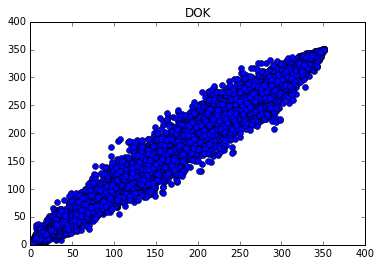

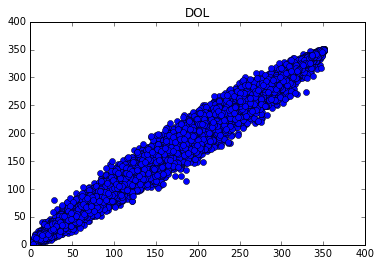

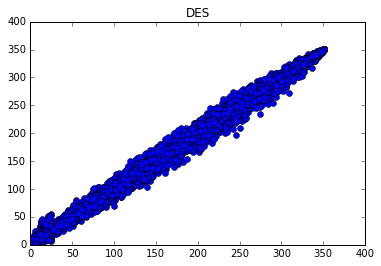

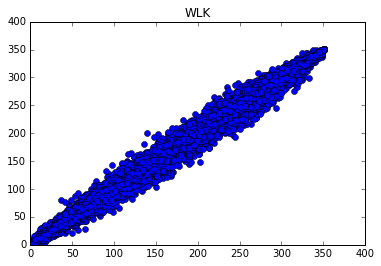

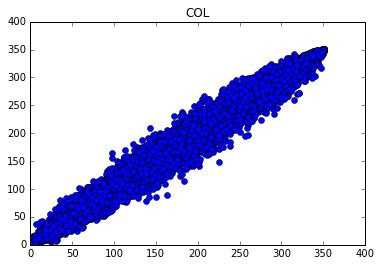

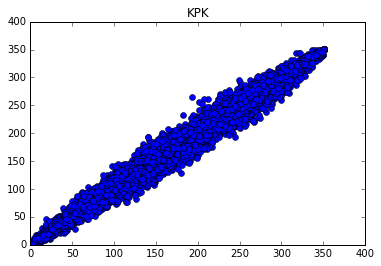

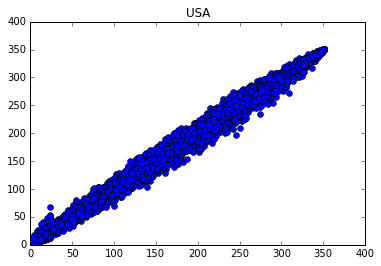

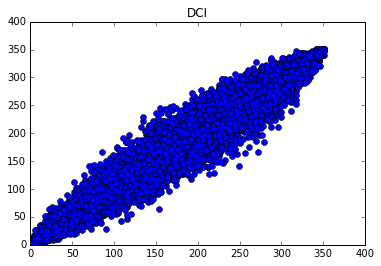

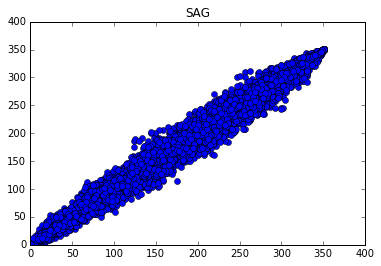

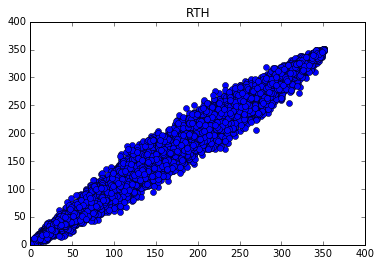

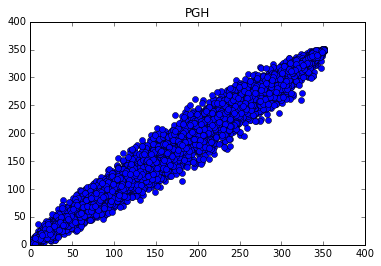

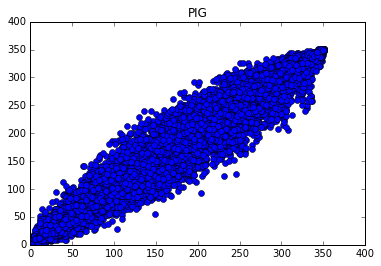

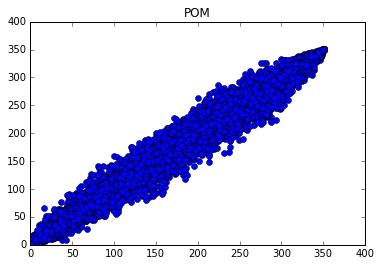

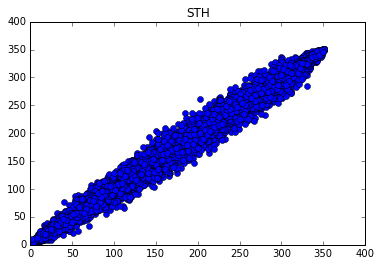

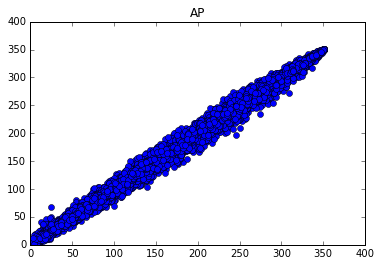

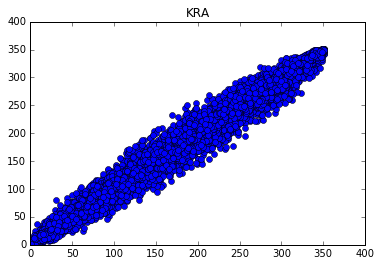

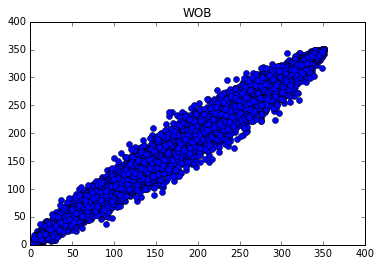

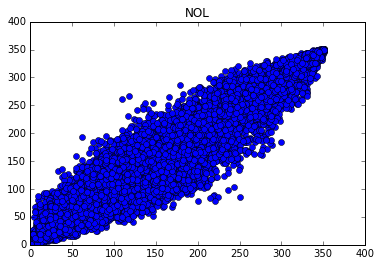

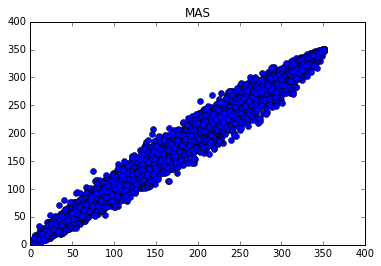

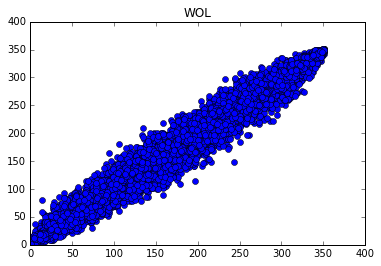

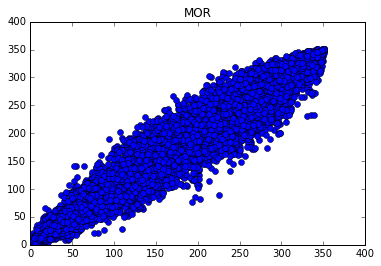

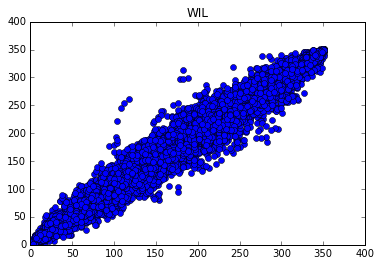

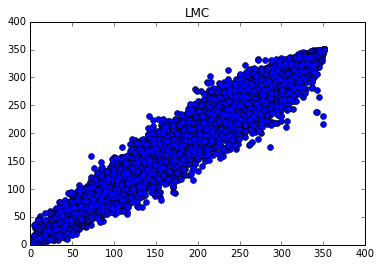

In [6]:
for ranker in ranker_list:
    plt.plot(data[ranker], data['label'], 'o')
    plt.title(ranker)
    plt.show()

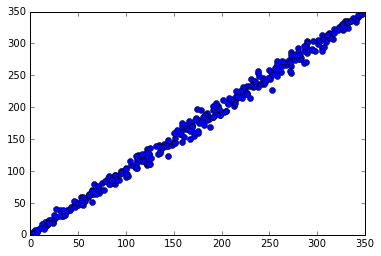

In [7]:
# How correlated is this week's label to next week's? This is important because the method for interpolating missing
# data is to use this week's label score (median rank) - wouldn't be fair if it were a perfect predictor of next week's
# rank.

a = data[data['date'] == 20100215][['name', 'label']]
b = data[data['date'] == 20100222][['name', 'label']]

c = a.merge(b, on='name')

plt.plot(c['label_x'], c['label_y'], 'o')

In [8]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import AdaBoostRegressor


In [9]:
regr_1 = DecisionTreeRegressor(max_depth=4)

regr_2 = AdaBoostRegressor(DecisionTreeRegressor(max_depth=6),
                           n_estimators=500)

In [10]:
X = data[ranker_list]
y = data['label']

In [11]:
data['date'].drop_duplicates()

0        20100215
347      20100222
694      20100301
1041     20100308
1388     20110213
1733     20110221
2078     20110228
2423     20110307
2768     20120212
3113     20120219
3458     20120226
3803     20120304
4148     20130217
4495     20130224
4842     20130303
5189     20130310
5536     20140216
5887     20140223
6238     20140302
6589     20140309
6940     20150215
7291     20150223
7642     20150301
7993     20150308
8344     20160214
8695     20160221
9046     20160228
9397     20160306
9748     20170212
10099    20170219
10450    20170226
10801    20170305
Name: date, dtype: int64

In [12]:
regr_1.fit(X, y)
regr_2.fit(X, y)

AdaBoostRegressor(base_estimator=DecisionTreeRegressor(criterion='mse', max_depth=6, max_features=None,
           max_leaf_nodes=None, min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, presort=False, random_state=None,
           splitter='best'),
         learning_rate=1.0, loss='linear', n_estimators=500,
         random_state=None)

In [13]:
y_1 = regr_1.predict(X)
y_2 = regr_2.predict(X)

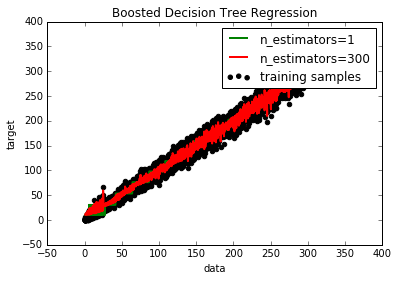

In [14]:
plt.figure()
px, py = zip(*sorted(zip(X['AP'], y)))
plt.scatter(px, py, c="k", label="training samples")
px, py_1 = zip(*sorted(zip(X['AP'], y_1)))
plt.plot(px, py_1, c="g", label="n_estimators=1", linewidth=2)
px, py_2 = zip(*sorted(zip(X['AP'], y_2)))
plt.plot(px, py_2, c="r", label="n_estimators=300", linewidth=2)
plt.xlabel("data")
plt.ylabel("target")
plt.title("Boosted Decision Tree Regression")
plt.legend()
plt.show()

In [15]:
model_rank = data[['name', 'date']].join(pandas.DataFrame({'rank': y_2}))
model_rank.sort_values(['date', 'rank'], ascending=[False, True])[:10]

,name,date,rank
10801,Villanova,20170305,11.000000
10816,Gonzaga,20170305,11.000000
10803,Kansas,20170305,11.142857
10806,Kentucky,20170305,11.833333
10802,North Carolina,20170305,12.166667
10869,UCLA,20170305,12.500000
10808,Louisville,20170305,14.800000
10810,Oregon,20170305,14.857143
10836,Florida,20170305,15.352041
10821,Baylor,20170305,16.583333


In [16]:
data[:5]

,AP,BOB,CMP,COL,DC,DCI,DES,DOK,DOL,KPK,...,SAG,STH,USA,WIL,WLK,WOB,WOL,date,label,name
0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,20100215,1.0,Kansas
1,11.0,17.0,19.0,25.0,20.0,28.0,13.0,19.0,19.0,29.0,...,18.0,18.0,11.0,22.0,22.0,24.0,29.0,20100215,24.0,Michigan St
2,15.0,10.0,10.0,17.0,10.0,25.0,12.0,10.0,16.0,11.0,...,10.0,9.0,17.0,12.0,13.0,12.0,18.0,20100215,13.0,Texas
3,2.0,4.0,4.0,3.0,7.0,4.0,2.0,5.0,4.0,3.0,...,4.0,7.0,2.0,4.0,5.0,4.0,4.0,20100215,3.0,Kentucky
4,3.0,7.0,5.0,4.0,2.0,5.0,3.0,11.0,2.0,5.0,...,5.0,6.0,3.0,2.0,2.0,2.0,2.0,20100215,8.0,Villanova


In [17]:
latest_rankings[['Team'] + ranker_list][:5]

,Team,DOK,DOL,DES,WLK,COL,KPK,USA,DCI,SAG,...,STH,AP,KRA,WOB,NOL,MAS,WOL,MOR,WIL,LMC
0,Kansas,2,1,1.0,1,1,1,1.0,1,1,...,1,1.0,1,1,1,1,1,2,1.0,1
1,Michigan St,3,3,2.0,2,8,4,2.0,2,2,...,5,2.0,5,6,4,3,5,1,3.0,4
2,North Carolina,1,2,3.0,3,4,3,3.0,3,3,...,3,3.0,8,7,5,2,7,3,7.0,3
3,Villanova,5,5,4.0,5,2,2,6.0,9,5,...,2,6.0,2,2,2,4,2,7,2.0,2
4,Virginia,4,4,7.0,4,6,5,5.0,4,4,...,4,4.0,6,8,11,5,9,4,8.0,5


In [18]:
X[:5]

,DOK,DOL,DES,WLK,COL,KPK,USA,DCI,SAG,RTH,...,STH,AP,KRA,WOB,NOL,MAS,WOL,MOR,WIL,LMC
0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,2.0,1.0,2.0
1,19.0,19.0,13.0,22.0,25.0,29.0,11.0,28.0,18.0,20.0,...,18.0,11.0,24.0,24.0,21.0,19.0,29.0,17.0,22.0,18.0
2,10.0,16.0,12.0,13.0,17.0,11.0,17.0,25.0,10.0,9.0,...,9.0,15.0,12.0,12.0,16.0,18.0,18.0,10.0,12.0,6.0
3,5.0,4.0,2.0,5.0,3.0,3.0,2.0,4.0,4.0,4.0,...,7.0,2.0,2.0,4.0,4.0,5.0,4.0,3.0,4.0,12.0
4,11.0,2.0,3.0,2.0,4.0,5.0,3.0,5.0,5.0,3.0,...,6.0,3.0,3.0,2.0,3.0,2.0,2.0,5.0,2.0,10.0


In [19]:
latest_model_rank = regr_2.predict(latest_rankings[ranker_list])
model_rank = latest_rankings[['Team']].join(pandas.DataFrame({'rank': latest_model_rank}))
model_rank.sort_values('rank')[:20]

,Team,rank
0,Kansas,11.000000
1,Michigan St,11.250000
3,Villanova,11.250000
2,North Carolina,11.562500
4,Virginia,12.166667
5,West Virginia,13.250000
7,Oregon,13.400000
6,Oklahoma,13.583333
9,Xavier,14.600000
8,Kentucky,15.512397


In [20]:
model_rank[model_rank['Team'] == 'Penn']

,Team,rank
253,Penn,254.851852


In [21]:
# Map team names to Kaggle team IDs
input_file_name = 'data/kaggle_2018/DataFiles/Teams.csv'
teams = pandas.read_csv(input_file_name)
teams[:5]

,TeamID,TeamName,FirstD1Season,LastD1Season
0,1101,Abilene Chr,2014,2018
1,1102,Air Force,1985,2018
2,1103,Akron,1985,2018
3,1104,Alabama,1985,2018
4,1105,Alabama A&M,2000,2018


In [22]:
team_name_map = {'UC Santa Barbara': 'Santa Barbara',
                 'Cal Poly': 'Cal Poly SLO',
                 'SIUE': 'Edwardsville'}

for name, replacement in team_name_map.iteritems():
    model_rank.loc[model_rank['Team'] == name, 'Team'] = replacement
    

In [23]:
df = model_rank.merge(teams[['TeamID', 'TeamName']], left_on='Team', right_on='TeamName', how='left') \
               .drop('TeamName', axis=1) \
               .sort_values('rank')

# double check that we captured all of the teams
print 'Teams missing TeamID...'
print df[df['TeamID'].isnull()]
print
df[:5]

Teams missing TeamID...
Empty DataFrame
Columns: [Team, rank, TeamID]
Index: []



,Team,rank,TeamID
0,Kansas,11.000000,1242
1,Michigan St,11.250000,1277
3,Villanova,11.250000,1437
2,North Carolina,11.562500,1314
4,Virginia,12.166667,1438


In [24]:
# In case some teams are missing, here's some code to search for modified spellings
for tn in teams[['TeamName']].sort_values('TeamName').iterrows():
    x = tn[1]['TeamName']
    if x.lower().find('SIU'.lower()) > -1:
        print x

Canisius


In [25]:
bracket_file_name = 'bracket.poll_of_polls.test.csv'
full_bracket_file_name = 'full_bracket.poll_of_polls.test.csv'

# break ties with some scaled noise
df['noise'] = numpy.random.random(df.shape[0]) - 0.5

z_min = df['rank'][:64].min()
z_max = df['rank'][:64].max()
z = z_max - z_min

df['norm_rank'] = ((df['rank'] - z_min)/z)

df[['TeamID', 'rank']].to_csv(bracket_file_name, header=False, sep=' ', index=False)
df.to_csv(full_bracket_file_name, header=True, sep='|', index=False)

In [26]:
df

,Team,rank,TeamID,noise,norm_rank
0,Kansas,11.000000,1242,0.047563,0.000000
1,Michigan St,11.250000,1277,0.005285,0.004506
3,Villanova,11.250000,1437,-0.265647,0.004506
2,North Carolina,11.562500,1314,-0.449727,0.010138
4,Virginia,12.166667,1438,-0.210470,0.021026
5,West Virginia,13.250000,1452,-0.239736,0.040550
7,Oregon,13.400000,1332,-0.007551,0.043254
6,Oklahoma,13.583333,1328,-0.117867,0.046558
9,Xavier,14.600000,1462,-0.156115,0.064881
8,Kentucky,15.512397,1246,0.494004,0.081324
